Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Titanic dataset from a CSV file
df = pd.read_csv('C:/Users/Hp/OneDrive/Desktop/mini project/train.csv')

Data Inspection

In [3]:
# Data Inspection

# Print the number of rows (samples) and columns (features) in the dataset
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
# Display information about the dataset, like data types and non-null counts
print(df.info())

Number of samples: 891
Number of features: 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
# Show the distribution of the 'Survived' column to see how many survived vs. not
print(df['Survived'].value_counts(normalize=True))

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


Statistics

In [5]:
# Display summary statistics for numerical columns (e.g., mean, min, max)
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
# Check for missing values in each column
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Visualization

<Figure size 1200x600 with 0 Axes>

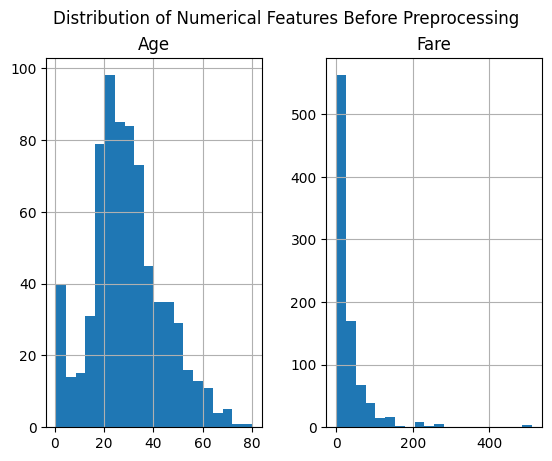

In [7]:
# Visualize the distribution of numerical features like 'Age' and 'Fare' before preprocessing
numerical_features = ['Age', 'Fare']
plt.figure(figsize=(12, 6))
df[numerical_features].hist(bins=20)  # Plot histograms for numerical features
plt.suptitle('Distribution of Numerical Features Before Preprocessing')
plt.show()

Data Preprocessing

In [8]:
# Data Preprocessing

# Fill missing values in 'Age' with the median age (common strategy)
df['Age'].fillna(df['Age'].median(), inplace=True)

# Scale numerical features to have a mean of 0 and standard deviation of 1
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Encode categorical features like 'Pclass' into numbers
label_encoder = LabelEncoder()
df['Pclass'] = label_encoder.fit_transform(df['Pclass'])

# Feature Engineering

# Create a new feature 'FamilySize' by adding the number of siblings/spouses and parents/children
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Extract titles (e.g., Mr, Mrs) from the 'Name' column
def extract_title(name):
    return name.split(',')[1].split('.')[0].strip()

# Apply the function to create a new 'Title' feature and encode it into numbers
df['Title'] = df['Name'].apply(extract_title)
df['Title_Encoded'] = label_encoder.fit_transform(df['Title'])

C:\Users\Hp\AppData\Local\Temp\ipykernel_5812\3317756431.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


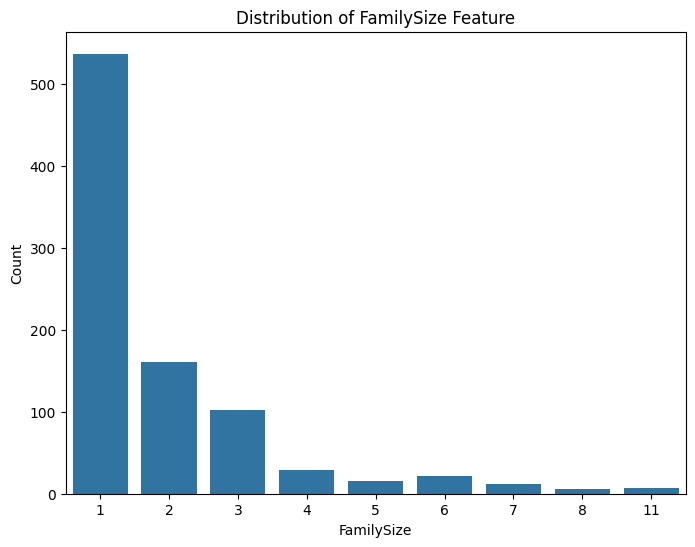

In [9]:
# Visualize the distribution of the new 'FamilySize' and 'Title' features
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='FamilySize')
plt.title('Distribution of FamilySize Feature')
plt.xlabel('FamilySize')
plt.ylabel('Count')
plt.show()

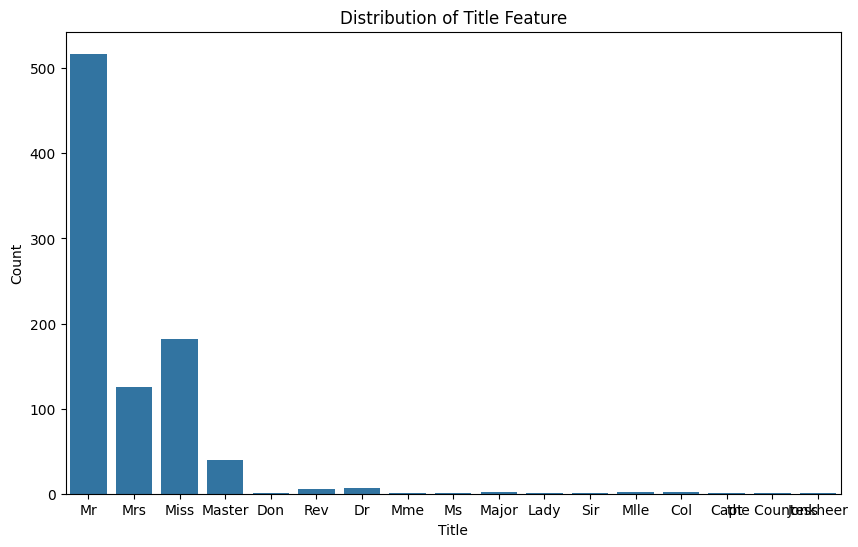

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Title')
plt.title('Distribution of Title Feature')
plt.xlabel('Title')
plt.ylabel('Count')
plt.show()

Handling Imbalanced Data

In [11]:
# Handling Imbalanced Data (if applicable)

# Check if there is an imbalance between the 'Survived' classes
imbalanced = df['Survived'].value_counts().sort_values(ascending=False)
ratio = imbalanced.iloc[0] / imbalanced.iloc[1]  # Calculate the ratio of the most common to the least common class

if ratio > 2:  # If the ratio is greater than 2, oversample the minority class
    # Split the dataset into features (X) and target (y)
    X = df.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])
    y = df['Survived']
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Apply SMOTE to balance the classes in the training data
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # Create a DataFrame for the resampled data (optional)
    df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
    df_resampled['Survived'] = y_resampled
    df = df_resampled.copy()  # Update the main DataFrame with resampled data


Saving Data

In [12]:
# Save the cleaned and processed dataset to a new CSV file
df.to_csv('C:/Users/Hp/OneDrive/Desktop/mini project/preprocessed_titanic_data.csv', index=False)
print("Preprocessed dataset saved as 'preprocessed_titanic_data.csv'.")

# Placeholder for machine learning modeling
# from sklearn.linear_model import LogisticRegression  # Example of a model
# model = LogisticRegression()
# model.fit(X_train, y_train)
# predictions = model.predict(X_test)
# ... (additional steps for evaluation and analysis)


Preprocessed dataset saved as 'preprocessed_titanic_data.csv'.
